In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import cv2
from kitti_object_plus import kitti_object, show_lidar_with_depth, show_image_with_boxes

In [2]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


random_idx: 244
sample: training 000481



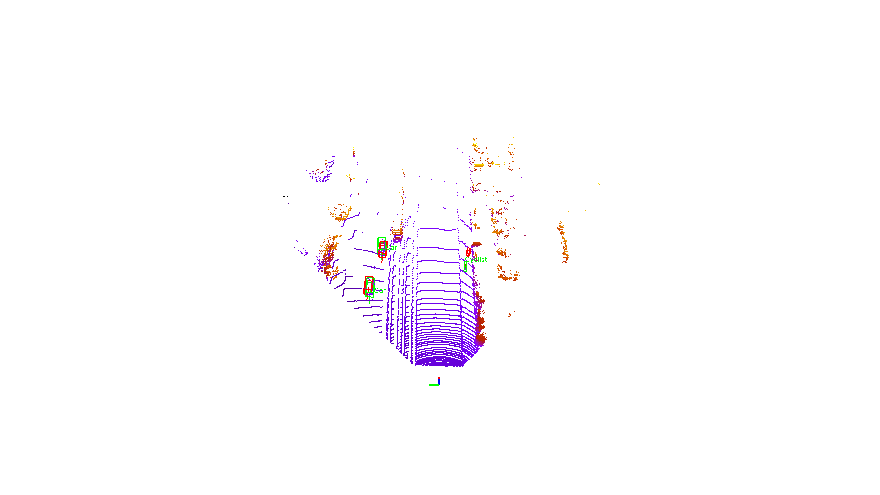

In [3]:
kitti_dir = '/path/to/KITTI/'
split = 'val1' # 'trainval', 'train1', 'train2', 'val1', 'val2', 'test'
pred_dir = '/path/to/prediction'
dataset = kitti_object(kitti_dir, split, pred_dir)

data_idx = random.randrange(len(dataset))
print('random_idx:', data_idx)
print('sample:', dataset.subset, '%06d'%dataset.sample_ids[data_idx])
objects = dataset.get_label_objects(data_idx)
objects_pred = dataset.get_pred_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(1, 1, 1), size=(880, 495))
show_lidar_with_depth(pc_velo, calib, fig_3d, objects, True, img_width, img_height, objects_pred=objects_pred)

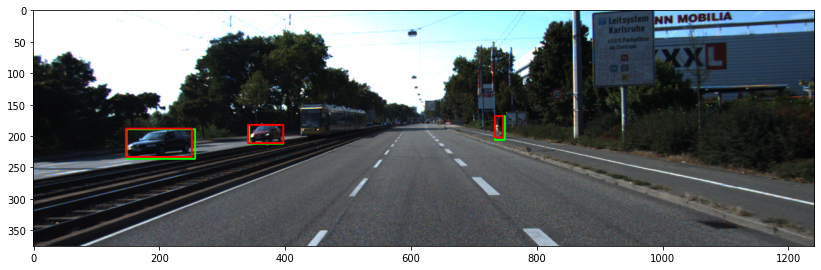

In [4]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, calib, objects=objects, objects_pred=objects_pred)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

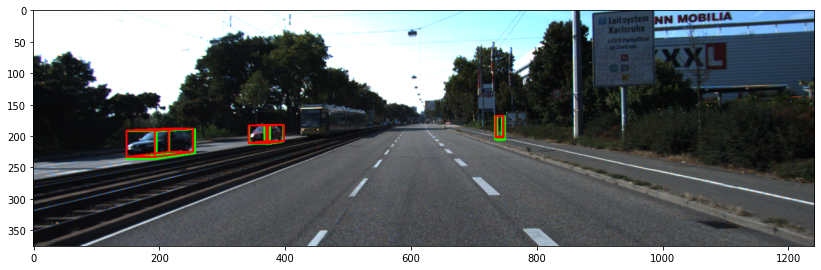

In [5]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()